In [102]:
import pandas as pd

invoice = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')

customers


,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [101]:
invoice

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


<h1> EASY QUESTIONS </h1>


<b> 1) How many unique customers are in the dataset? </b>

In [63]:
names = invoice['customer_id']

names.nunique()

5191

<b> 2. What are the different categories of products available? How many unique categories are there? </b>

In [28]:
#number of unique categories
categories = invoice['category'].nunique()

categories

8

In [44]:
#unique categories
categories = pd.Series(invoice['category'].unique())

categories

0           Clothing
1              Shoes
2              Books
3          Cosmetics
4    Food & Beverage
5               Toys
6         Technology
7           Souvenir
dtype: object

<b> 3. Which payment method is the most popular? How many times was it used? </b>

In [70]:
#most popular payment method

method = invoice['payment_method'].value_counts()

method.idxmax()

'Cash'

In [71]:
#number of times cash was used

method.max()

44447

<h1> MEDIUM QUESTIONS </h1>

<b> 1. What are the three most popular categories, by total sales? </b>

In [95]:
#isolates 'category' and 'price' column
method = invoice[['category', 'price']]

#sums up all of the sales per category
sums = method.groupby('category').sum()['price']

#Gets the three largest values, removes the 'price' column, and keeps the index.
rank = pd.Series(sums.nlargest(n=3).index.tolist())

rank

0      Clothing
1         Shoes
2    Technology
dtype: object

<b> 2. What are the total sales attributed to customers over the age of 45? </b>

In [129]:
import pandas as pd

#call the csv and json files
invoice = pd.read_csv('fct_invoice.csv')
customers = pd.read_json('dim_customer.json')

#rename the files so that the columns will overlap
invoice.rename(columns={'customer_id' : 'id'}, inplace = True)
merged_data = pd.merge(invoice, customers, on='id')

#filter the data
aged = merged_data[merged_data['age'] > 45] 

#get the sum of the data (could've used int but i didn't want to remove the centavos)
sales_aged = aged['price'].sum()

sales_aged

22370553.27

<b> 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.) </b>

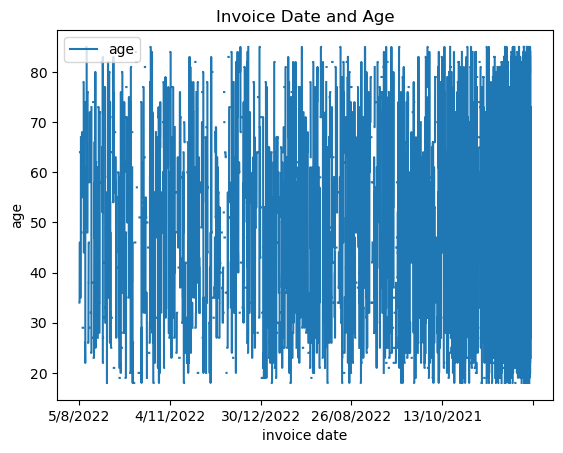

In [137]:
import matplotlib.pyplot as plt

merged_data.plot(x = 'invoice_date', y='age')

plt.xlabel('invoice date')
plt.ylabel('age')
plt.title('Invoice Date and Age')

plt.show()

### On Age and Invoice Date

insight: during 2021, people of varying ages purchased products. By 2022, young and old consumers decreased. As of the latest data, most consumers are in the 40-60 age range.

possible conclusion:

Whether intentionally or not, the company has been catering less to young and old consumers, and started to sell more to the age 40-60 bracket.

<h1> HARD QUESTION </h1>

<b>1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth). </b>

In [241]:
merged_data['age'].max() #this is 85,
merged_data['age'].min() #this is 18
# both of these imply that I need 8 ranges in 10s (from 10 to 89)

breakdown = merged_data.groupby(['category', 'age'])['price'].sum()
age_ranges = [10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']


# merged_data['age'] = pd.cut(merged_data['age'], bins=age_ranges, labels=age_labels[:-1], right=False)
# this function pd.cut was used to change the labels found in the 'age' column.

breakdown

category  age  
Books     10-19      3469.35
          20-29     21619.05
          30-39     22997.70
          40-49     23361.30
          50-59     20664.60
                     ...    
Toys      40-49    106910.72
          50-59     94115.84
          60-69    100244.48
          70-79     74475.52
          80-89     43043.84
Name: price, Length: 64, dtype: float64